# LAB 1 : Realisation of Logic Gates and Linear Regression 

Name : 

Roll Number : 

Referrence Material : Page no. 26-29, Artificial Neural Network by B. Yegnanarayana




#**Problem 1** : Demonstrate the realization of NAND gate, NOR gate, and XOR gate using McCulloch Pitts (MP) and Rosenblatt’s Perceptron model.

  1. Write down the truth table of the logic gates.
  2. For MP model: compute the appropriate weight, such that the neuron provide logic
  gate output.
  3. For Perceptron: use truth table values as input and output to learn the weights
  through weight update equation.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



=== Write your answer here ===

## Programming : 
  Please write a program to demonstrate the same

In [2]:
## Part A : MP model

import torch
import numpy as np
import matplotlib.pyplot as plt


def mp_model(x,gate):
 
  ## Write the activation function and define weights and bias for all three gates
  
  if gate == "NAND":

    threshold = -1
    w = [-1,-1]
    w = np.array(w).reshape(2,1)
    if np.matmul(w.T,x) >= threshold:
      out = 1
    else:
      out = 0
    
  if gate == "NOR":

    threshold = 0
    w = [-1,-1]
    w = np.array(w).reshape(2,1)
    if np.matmul(w.T,x) >= threshold:
      out = 1
    else:
      out = 0
    
  if gate == "XOR":

    threshold1 = 0
    w1 = [-1,-1]
    w1 = np.array(w1).reshape(2,1)
    if np.matmul(w1.T,x) >= threshold1:
      out1 = 1
    else:
      out1 = 0
    
    threshold2 = -1
    w2 = [-1,-1]
    w2 = np.array(w2).reshape(2,1)
    if np.matmul(w2.T,x) >= threshold2:
      out2 = 0
    else:
      out2 = 1

    threshold3 = 0
    temp = np.array([out1,out2]).reshape(2,1)
    w3 = np.array([-1,-1]).reshape(2,1)
    if np.matmul(w3.T,temp) >= threshold3:
      out = 1
    else:
      out = 0


  
  return out


inp_list = [[0,0],[0,1],[1,0],[1,1]] ## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
# req_gates = list("NAND","NOR","XOR") ## Create a list of all gates (NAND,NOR,XOR)
req_gates = ["NAND","NOR","XOR"]

for gate in req_gates:
  print('Results for ' + gate + ' gate : ')
  for inp in inp_list:
    print("Input is : " + str(inp))
    out = mp_model(inp,gate)
    print("Logic Gate output is : ",out)
  
  print('=====================================')

Results for NAND gate : 
Input is : [0, 0]
Logic Gate output is :  1
Input is : [0, 1]
Logic Gate output is :  1
Input is : [1, 0]
Logic Gate output is :  1
Input is : [1, 1]
Logic Gate output is :  0
Results for NOR gate : 
Input is : [0, 0]
Logic Gate output is :  1
Input is : [0, 1]
Logic Gate output is :  0
Input is : [1, 0]
Logic Gate output is :  0
Input is : [1, 1]
Logic Gate output is :  0
Results for XOR gate : 
Input is : [0, 0]
Logic Gate output is :  0
Input is : [0, 1]
Logic Gate output is :  1
Input is : [1, 0]
Logic Gate output is :  1
Input is : [1, 1]
Logic Gate output is :  0


Weights for NAND : 
[[ 1.00000000e-01]
 [-1.00000000e-01]
 [-2.77555756e-17]]
Weights for NOR : 
[[ 0.1]
 [-0.1]
 [-0.1]]
Weights for XOR : 
[[ 1.00000000e-01]
 [-1.00000000e-01]
 [-2.77555756e-17]]


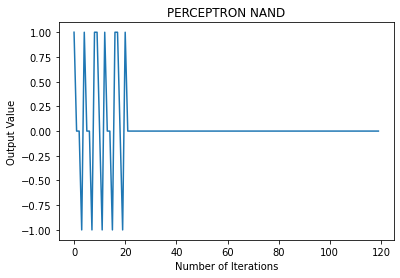

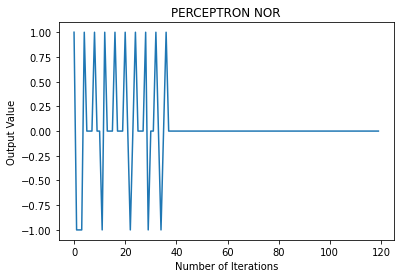

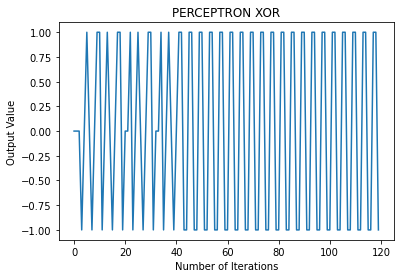

In [3]:
## Part B : Rosenblatt's Percept

import numpy as np
import matplotlib.pyplot as plt

def rosenblatt_perceptron(inp_list,y_true,learning_rate,w_init,num_epochs,gate):

  error = []
  
  for epoch in range(num_epochs):

    for idx,input in enumerate(inp_list):

      input = np.array(input).reshape(len(input),1)
      act_val = np.matmul(w_init.T,input)

      if act_val > 0:
        y_pred = 1
      else:
        y_pred = 0
      
      err = y_true[idx] - y_pred
      error.append(err)
      w_new = w_init + learning_rate*err*input
      w_init = w_new 
      
    
    ## Write the learning code here, return new weights and error, Save the error value after each iteration to plot a error v/s iteration graph in case of all 3 gates

  return w_new,error

inp_list = [[1,0,0],[1,0,1],[1,1,0],[1,1,1]]## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
nand_output = [1,1,1,0]## Define NAND gate target output
nor_output = [1,0,0,0]## Define NOR gate target output
xor_output = [0,1,1,0]## Define XOR gate target output

learning_rate = 0.1 ## Define a learning rate
w_initial = np.array([-0.2,0.4,0.3]).reshape(3,1) ## Initialise weights
num_epochs = 30 ## Set number of epochs

## For NAND gate
w_new1,error1 = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")

## For NOR gate
w_new2,error2 = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")

## For XOR gate
w_new3,error3 = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")

fig1, ax1 = plt.subplots()
ax1.plot(error1)
ax1.set_title('PERCEPTRON NAND')
ax1.set_xlabel('Number of Iterations')
ax1.set_ylabel('Output Value')
print("Weights for NAND : ")
print(w_new1)

fig2, ax2 = plt.subplots()
ax2.plot(error2)
ax2.set_title('PERCEPTRON NOR')
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('Output Value')
print("Weights for NOR : ")
print(w_new2)

fig3,ax3 = plt.subplots()
ax3.plot(error3)
ax3.set_title('PERCEPTRON XOR')
ax3.set_xlabel('Number of Iterations')
ax3.set_ylabel('Output Value')
print("Weights for XOR : ")
print(w_new3)

## Inferences and Conclusion : State all the key observations and conclusion

=== Write your answer here ===

# **Problem 2** : Demonstrate the realization of y = 1 + 2x1 + 2x2 using Widrow’s Adaline model.

  1. Generate some N no. of data points using equation y = 1 + 2x1 + 2x2.
  2. Use the input and output data to train the Adaline model, after training the Adaline
  model should provide appropriate y as output value for any arbitrary input.

## Write down the Objectives, Hypothesis and Experimental description for the above problem

=== Write your answer here ===

## Programming : 
  Please write a program to demonstrate the same

torch.Size([3, 100])
Final Weights for Learning rate - 0.001 are :- 
tensor([[0.0335],
        [1.7728],
        [1.9562]])


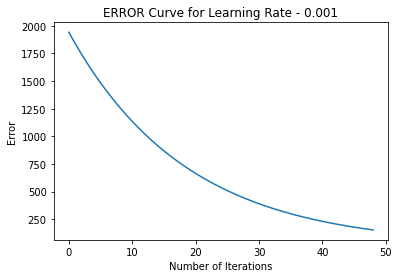

In [4]:
import random
import torch
def adaline(lr):

  n = 100
  x1=torch.tensor(random.choices(range(100),k=100)).reshape(1,100)
  x2=torch.tensor(random.choices(range(100),k=100)).reshape(1,100)
  # x1 = torch.linspace(-1,1,n).reshape(1,n) # Input Generation
  # x2 = torch.linspace(1,5,n).reshape(1,n) # Input Generation

  y_true = torch.add(1,torch.add(2*x1,2*x2)) # True Output

  # w = [0.7,2.6,1.3]
  w = [0,0,0]
  #w = np.random.random_sample((3,)) # Weight Initialisation

  # Converting Inputs and weights to Tensors 

  ones = torch.ones(n).reshape(1,n) 
  x = torch.cat([x1,x2],dim=0)
  x = torch.cat([ones,x],dim=0) # Augmenting the Input
  print(x.shape) 
  
  w = torch.tensor(w).reshape(len(w),1).float()
  #print(w.shape)

  
  epochs = 50
  error = []
  
  # Training Loop 

  for eps in range(epochs):
    
    y = torch.mm(w.T,x)
    #print(y.shape)
    
    err = torch.sub(y_true,y).float()
    temp = torch.sqrt(torch.sum(torch.mul(err,err)))/len(err) # Mean Square Error
    error.append(temp)
    w_new = torch.add(w,lr*torch.mm(x,err.T)) # Weight Update
    w = w_new
  
  error.pop(0)
  
  return error,w_new

lr1 = 0.0000001
error,w_new = adaline(lr1)
fig,ax = plt.subplots()
ax.plot(error)
ax.set_title('ERROR Curve for Learning Rate - 0.001')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Error')

print('Final Weights for Learning rate - 0.001 are :- ')
print(w_new)


## Inferences and Conclusion : State all the key observations and conclusion

=== Write your answer here ===